In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
objective_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2021-10-25 12:36:28.484697: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-25 12:36:28.484809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


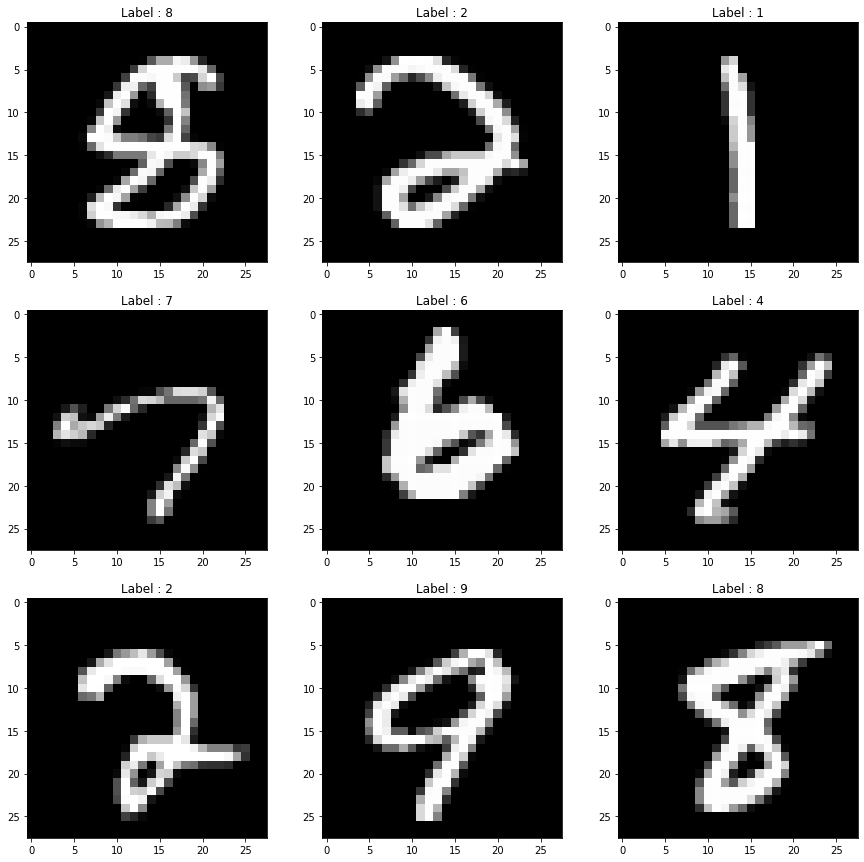

In [4]:
train_images = train_df.drop(['label'], axis=1).to_numpy()
train_label = train_df['label'].to_numpy()

train_images = train_images / 255

train_count = int(train_images.shape[0] * 60 / 100);
test_count = train_images.shape[0] - train_count;
test_images = train_images[train_count:].reshape((test_count, 28, 28, 1))
train_images = train_images[:train_count].reshape((train_count, 28, 28, 1))
test_label = train_label[train_count:]
train_label = train_label[:train_count]

pick = np.arange(train_count)
np.random.shuffle(pick)

f, axs = plt.subplots(3, 3, figsize=(15,15))
for i, ax in zip(pick[:9], axs.reshape(-1)):
  ax.title.set_text("Label : " + str(train_label[i]))
  ax.imshow(train_images[i][:,:,0], cmap='gray')

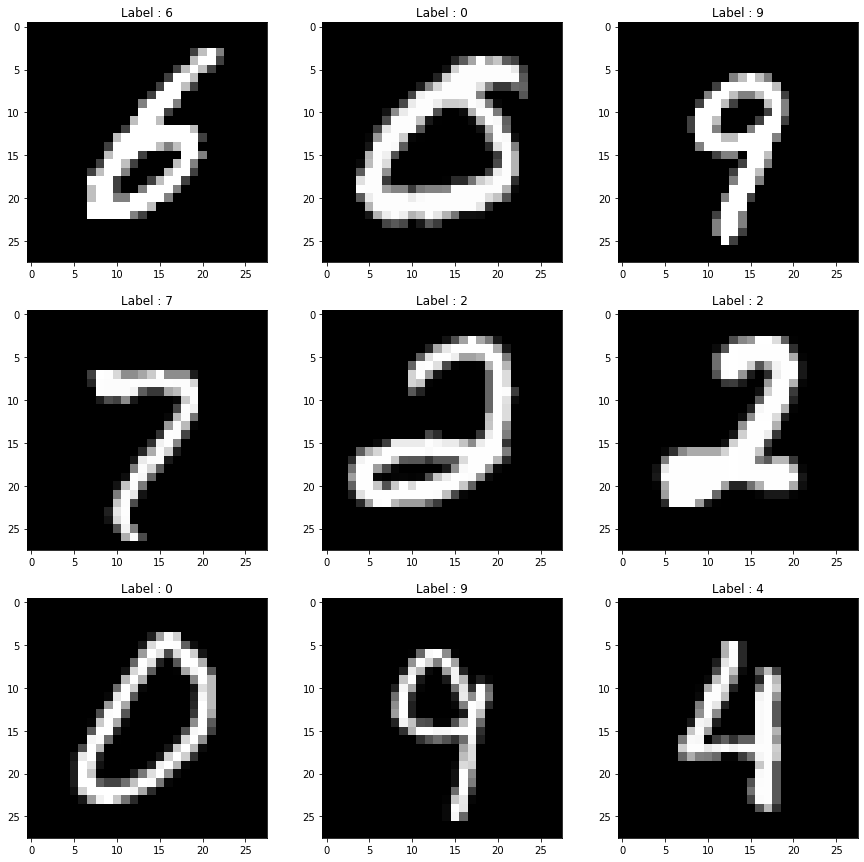

In [5]:
pick = np.arange(test_count)
np.random.shuffle(pick)
f, axs = plt.subplots(3, 3, figsize=(15,15))
for i, ax in zip(pick[:9], axs.reshape(-1)):
  ax.title.set_text("Label : " + str(test_label[i]))
  ax.imshow(test_images[i][:,:,0], cmap='gray')

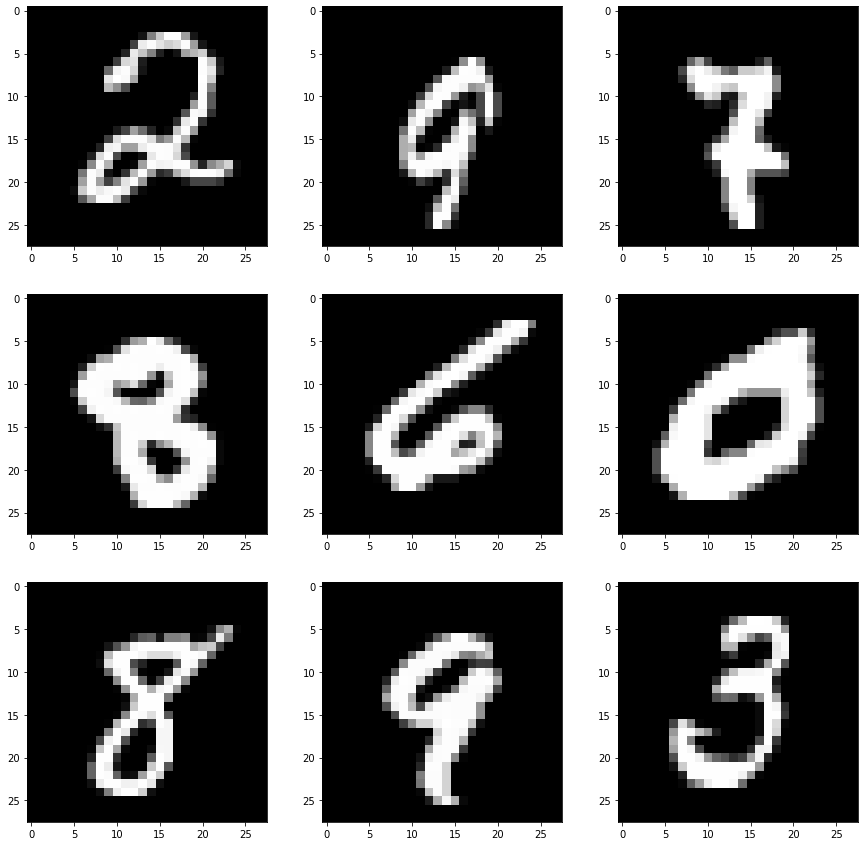

In [6]:
objective_images = objective_df.to_numpy()
objective_images = objective_images / 255

objective_count = objective_images.shape[0]
objective_images = objective_images.reshape((objective_count, 28, 28, 1))

pick = np.arange(objective_count)
np.random.shuffle(pick)

f, axs = plt.subplots(3, 3, figsize=(15,15))
for i, ax in zip(pick[:9], axs.reshape(-1)):
  ax.imshow(objective_images[i][:,:,0], cmap='gray')

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

2021-10-25 12:36:38.189770: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-25 12:36:38.192546: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-25 12:36:38.192583: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-25 12:36:38.192610: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (82700e42159b): /proc/driver/nvidia/version does not exist
2021-10-25 12:36:38.193630: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_label, epochs=20, 
                    validation_data=(test_images, test_label))

2021-10-25 12:36:38.615811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-25 12:36:38.629760: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/20
788/788 [==============================] - 17s 21ms/step - loss: 0.5523 - accuracy: 0.8236 - val_loss: 0.0809 - val_accuracy: 0.9727
Epoch 2/20
788/788 [==============================] - 16s 20ms/step - loss: 0.0687 - accuracy: 0.9782 - val_loss: 0.0734 - val_accuracy: 0.9752
Epoch 3/20
788/788 [==============================] - 16s 20ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 4/20
788/788 [==============================] - 16s 20ms/step - loss: 0.0352 - accuracy: 0.9883 - val_loss: 0.0425 - val_accuracy: 0.9874
Epoch 5/20
788/788 [==============================] - 16s 20ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.0589 - val_accuracy: 0.9833
Epoch 6/20
788/788 [==============================] - 16s 20ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0725 - val_accuracy: 0.9780
Epoch 7/20
788/788 [==============================] - 15s 19ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0536 - val_accuracy:

525/525 - 3s - loss: 0.0606 - accuracy: 0.9885


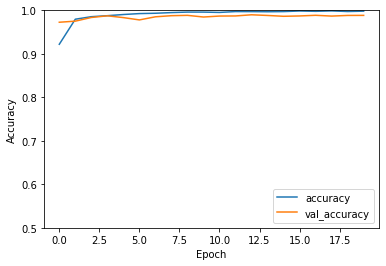

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_label, verbose=2)

In [11]:
res = model.predict(objective_images)

In [12]:
predicted_label = []
for label in np.array(res) :
  predicted_label.append(np.argmax(label))

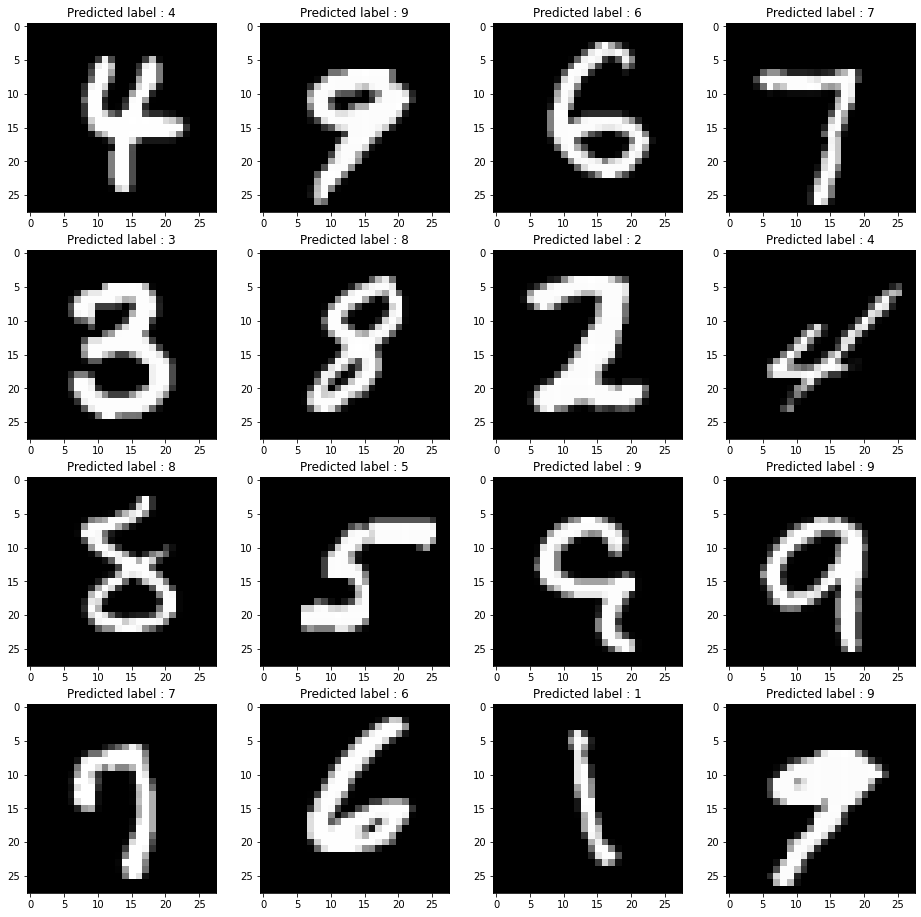

In [13]:
pick = np.arange(objective_count)
np.random.shuffle(pick)

f, axs = plt.subplots(4, 4, figsize=(16,16))

for i, ax in zip(pick[:16], axs.reshape(-1)):
  ax.title.set_text('Predicted label : ' + str(predicted_label[i]))
  ax.imshow(objective_images[i][:,:,0], cmap='gray')

In [14]:
df = pd.DataFrame([[i + 1, predicted_label[i]] for i in range(objective_count)], columns=["ImageId", "Label"])
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [15]:
df.to_csv('submission.csv', index=False)